In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib as mpl
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 100

Some helper functions:

In [7]:
def plot_x_p_sigma(t,results):
    s = results.states
    exp_x = expect(x, s)
    exp_p = expect(p, s)
    sigma_x2 = expect(x**2, s) - exp_x**2
    sigma_p2 = expect(p**2, s) - exp_p**2

    plt.subplots(figsize=(12,4))
    plt.subplot(121)
    plt.plot(t, exp_x, label='<x>')
    plt.plot(t, exp_p, label='<p>')
    plt.legend()
    plt.subplot(122)
    plt.plot(t, sigma_x2, label='sig_x')
    plt.plot(t, sigma_p2, label='sig_p')
    plt.legend()

In [51]:
def make_wigner_animation(wigners):
    wig = wigners[0]
    wlim= abs(wig).max()
    fig = plt.figure()
    ax_image = plt.imshow(wig,cmap='RdBu', norm=mpl.colors.Normalize(-wlim, wlim))
    def update(n):
        print(".", end='')
        ax_image.set_data(wigners[n])
    anim = animation.FuncAnimation(fig, update, frames=len(wigners))
    plt.close(fig)
    return anim

In [56]:
def make_winger_functions(results):
    s = results.states
    x = np.linspace(-5,5,50)
    wigners = []
    for i in range(len(s)):
        print("*", end='')
        wigners.append(wigner(s[i],x,x))
    return wigners

In [59]:
# This one should be run in a cell with %matplotlib notebook
def plot_interactive_wigner(wigners):
    W = wigners[0]
    wlim = abs(W).max()
    ax_image = plt.imshow(W,cmap='RdBu', norm=mpl.colors.Normalize(-wlim, wlim))
    def update(i=0):
        ax_image.set_data(wigners[i])
    interact(update,i=(0,len(wigners)-1))       

# Set things up 

Hilbert space size, basic opeartors

In [11]:
N = 50
w0 =  1 *2*np.pi
a = destroy(N)
n = a.dag()*a
x = a+a.dag()
p = -1j*(a-a.dag())
k = 1
m = 1

# Try modulating the frequency

It does nothing!

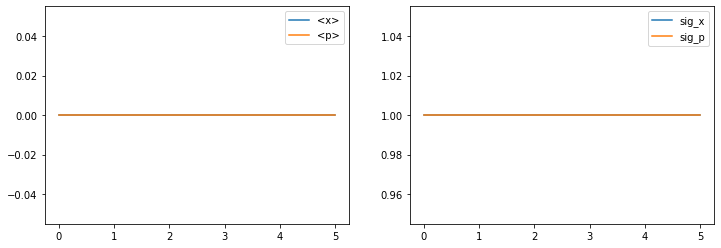

In [12]:
H0 = w0 * n

psi0 = fock(N,0)

t =  np.linspace(0,5,1000)
results1 = sesolve(H0, psi0, t)

plot_x_p_sigma(t,results1)

# Benchmark: rewrite H in terms of x and p

At first, include no modulation, make sure it does nothing

In [13]:
H0  = 0.5*k*x**2 + p**2/m/2

# Six oscillations
t =  np.linspace(0,6*np.pi,100)

First, the ground state

In [14]:
# Some benchmarking
psi0 = fock(N,0)
results2 = sesolve(H0, psi0, t)

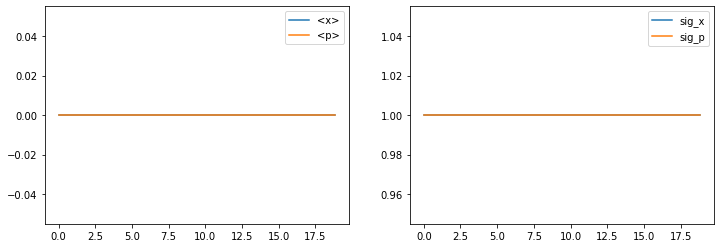

In [15]:
plot_x_p_sigma(t,results2)

In [55]:
wigners = make_winger_functions(results2)
anim = make_wigner_animation(wigners)
anim

.....................................................................................................

Now the coherent state

In [31]:
psi0 = coherent(N,1)
results3 = sesolve(H0, psi0, t)

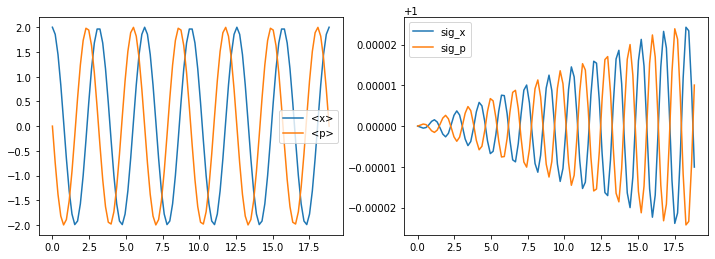

In [23]:
plot_x_p_sigma(t,results3)

There is some error creeping in our sigmas: this is likely numerical integration error from the solver. 

In [58]:
wigners = make_winger_functions(results3)
anim = make_wigner_animation(wigners)
anim

****************************************************************************************************.....................................................................................................

# OK, now let's try modulation

## Modulation with ground state

In [64]:
# Relative spring constant modulation
eps = 0.1

H0  = 0.5*k*x**2 + p**2/2/m
H1 = 0.5*eps*k*x**2

def f(t, args):
    return np.cos(2*w0*t)

# Now try including spring constant modulation
H  =  [H0, [H1, f]]
psi0 = fock(N,0)

t =  np.linspace(0,1*np.pi,50)
c_ops = [0.1*a]
results4 = mesolve(H, psi0, t, c_ops=c_ops)

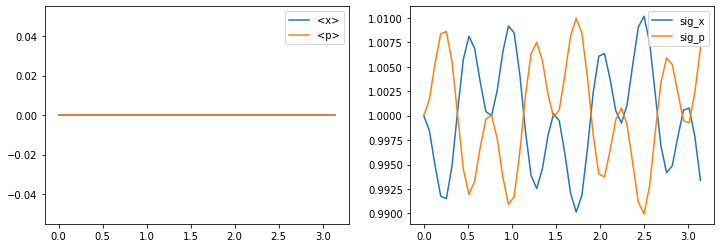

In [65]:
plot_x_p_sigma(t,results4)

In [66]:
wigners = make_winger_functions(results4)
anim = make_wigner_animation(wigners)
anim

**************************************************...................................................

Nothing?

## Modulation with a coherent state

In [81]:
# Relative spring constant modulation
eps = 0.1

H0  = 0.5*k*x**2 + p**2/2/m
H1 = 0.5*eps*k*x**2

def f(t, args):
    return np.cos(2*w0*t)

# Now try including spring constant modulation
H  =  [H0, [H1, f]]
psi0 = coherent(N,1)

t =  np.linspace(0,20*np.pi,500)
c_ops = [0.1*a]
c_ops = []
results5 = mesolve(H, psi0, t, c_ops=c_ops)

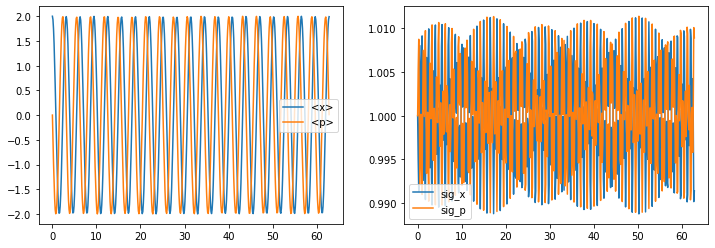

In [82]:
plot_x_p_sigma(t,results5)

In [72]:
wigners = make_winger_functions(results5)
anim = make_wigner_animation(wigners)
anim

********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................